In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## Приводит ли вдыхание асбеста к заболеваниям легких?

### Основная гипотеза должна быть консервативной

**Основная гипотеза - Связи нет.**

Как ее проверить? Если связи нет, то мы не ожидаем разницы в количестве заболеваниях легких в группах которые входили или не входили в контакт с асбестом

Даже если основная гипотеза верна в эксперименте разница будет но чисто по случайности.

Мы моделируем количество заболеваний в обоих групах как случайную величину и знаем что разница средних значений также случайная величина с распределением Гаусса.

**Если связи на самом деле нет, эта случайная величина имеет мат. ожидание 0 (разницы в группах нет**

**Вопрос: Исходя из того что связи нет, какя вероятность увидеть результат наблюдаемый в эксперименте или более экстремальный результат?**

Фиктивные данные:
* Группа 1, n=50, x=12, $p_1=0.24$
* Группа 2, m=50, x=25, $p_2=0.5$

$$s = \sqrt{p_1(1-p_1)/n + p_2(1-p_2)/m}$$

In [2]:
p1=0.24; p2=0.5;n=50; m=50

In [5]:
s=np.sqrt(p1*(1-p1)/n+p2*(1-p2)/m)

In [6]:
s

0.09299462350050136

**Нормализированая величина которая должна имеет стандартное нормальное распределение, если основная гипотеза верна:**

$$W=\frac{p_1-p_2}{s}$$

In [11]:
W= (p1-p2)/s

In [12]:
W

-2.7958605585257117

Вероятность получить такие же или более экстремальные значения W, если основная гипотеза верна:

In [13]:
p=2*stats.norm.cdf(-np.abs(W))

In [14]:
p

0.005176172807697869

**Итак вероятность этого 0.5% - это довольно сильная очевидность против основной гипотезы и отвергаем ее.**

## Графики из урока

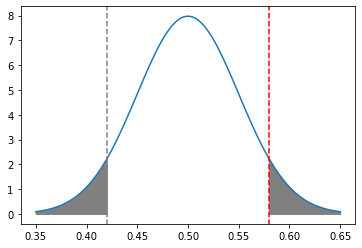

In [27]:
mu = 0.5
variance = 0.0025
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax = plt.gca()
y_lim=ax.get_ylim()
plt.axvline(x=0.58, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='red')
plt.axvline(x=0.42, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='gray')
px=np.linspace(0.58,x[-1],10)
px_m = np.linspace(x[0],0.42,10)
iq = stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='gray')
plt.fill_between(px_m,iq.pdf(px_m),color='gray')
plt.savefig('p_values.png')

In [28]:
mu = 0.5
sigma = 0.05
p = 2*stats.norm.cdf(0.42, mu, sigma)

In [29]:
p

0.10959858339911595

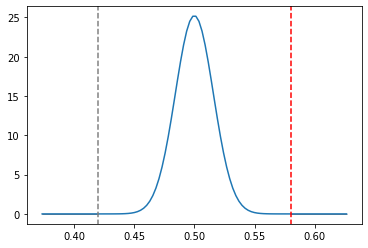

In [33]:
mu = 0.5
variance = 2.5e-4
sigma = math.sqrt(variance)
x = np.linspace(mu - 8*sigma, mu + 8*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax = plt.gca()
y_lim=ax.get_ylim()
plt.axvline(x=0.58, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='red')
plt.axvline(x=0.42, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='gray')
px=np.linspace(0.58,x[-1],10)
px_m = np.linspace(x[0],0.42,10)
iq = stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='gray')
plt.fill_between(px_m,iq.pdf(px_m),color='gray')
plt.savefig('p_values_2.png')

In [34]:
mu = 0.5
sigma = 0.016
p = 2*stats.norm.cdf(0.42, mu, sigma)

In [35]:
p

5.733031437583835e-07

In [41]:
z = (97.32-93.29)/1.7

In [42]:
z

2.37058823529411

In [44]:
2*stats.t.cdf(-z, df=99)

0.019696785381582614

In [45]:
2*stats.norm.cdf(-2.89)

0.0038524182643757173

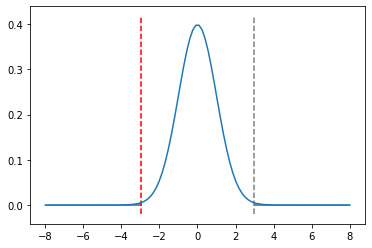

In [61]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 8*sigma, mu + 8*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax = plt.gca()
y_lim=ax.get_ylim()
plt.vlines(x=-2.98, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='red')
plt.vlines(x=2.98, ymin=y_lim[0], ymax=y_lim[1],linestyle="--", color='gray')
px=np.linspace(2.98,x[-1],10)
px_m = np.linspace(x[0],-2.98,10)
iq = stats.norm(mu,sigma)
plt.fill_between(px,iq.pdf(px),color='gray')
plt.fill_between(px_m,iq.pdf(px_m),color='gray')
#plt.savefig('p_values_3.png')

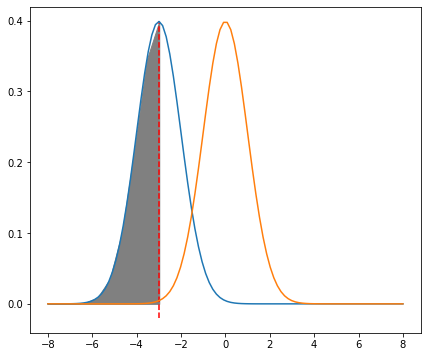

In [69]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 8*sigma, mu + 8*sigma, 100)
fig, ax  = plt.subplots(figsize=(7, 6))
data = stats.norm.pdf(x, -3, sigma)
ax.plot(x, data)
y_lim=ax.get_ylim()
ax.vlines(x=-2.98, ymin=y_lim[0], ymax=data[data==data.max()],linestyle="--", color='red')
ax.plot(x, stats.norm.pdf(x, mu, sigma))
px_m = np.linspace(x[0],-2.98,10)
iq = stats.norm(-3,sigma)
ax.fill_between(px_m,iq.pdf(px_m),color='gray')
plt.savefig('p_values_4.png')

In [55]:
ymax

0.41886802523929134

In [270]:
n_array = []

In [271]:
power_array = []

In [272]:
mu_1 = 0
mu_2 = -3
sigma_orig = 20.0

In [470]:
n = 3000

In [471]:
print(sigma_orig)

20.0


In [472]:
variance = np.sqrt(sigma_orig**2/n + sigma_orig**2/n)

In [473]:
print(variance)

0.5163977794943222


In [474]:
sigma = math.sqrt(variance)
x = np.linspace(mu_1 - 8*sigma, mu_1 + 8*sigma, 100)

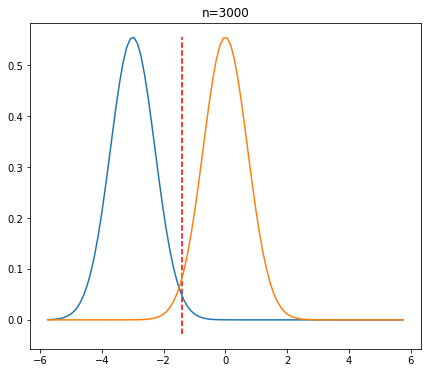

In [475]:
fig, ax  = plt.subplots(figsize=(7, 6))
data = stats.norm.pdf(x, mu_2, sigma)
ax.plot(x, data)
ax.plot(x, stats.norm.pdf(x, mu_1, sigma))
y_lim=ax.get_ylim()
boundary = stats.norm.ppf(0.025, mu_1, sigma)
ax.vlines(x=boundary, ymin=y_lim[0], ymax=data[data==data.max()],linestyle="--", color='red')
ax.set_title('n={}'.format(n))
plt.savefig('power_{}.png'.format(n))

In [476]:
power = stats.norm.cdf(boundary, mu_2, sigma)

In [477]:
power

0.9866121595681175

In [478]:
power_array.append(power)

In [479]:
n_array.append(n)

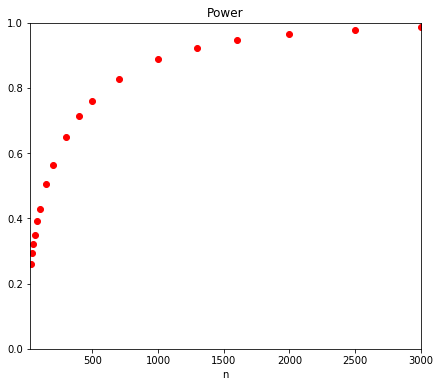

In [480]:
fig, ax  = plt.subplots(figsize=(7, 6))
ax.plot(n_array,power_array, 'ro')
ax.set_title('Power')
ax.set_xlabel('n')
ax.set_ylim([0,1])
ax.set_xlim([25,3000])
plt.savefig('power_{}_c.png'.format(n))